## 필수과제 3
- 서베이 데이터 가지고 간단한 시각화 및 전처리
- 정규표현식을 가지고 한글만 남기고 모두 다 삭제해 주시고
- 만족도에 따른 분석도, 시계열에 따른 분석도 가능하다.
- 두 가지 컬럼을 가지고 텍스트를 분석해 보기
- 시각화 + 분석 내용을 요약

In [ ]:
import re
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
survey = pd.read_csv('/content/drive/MyDrive/DATA/survey_설문지.csv')

In [ ]:
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


In [ ]:
survey['comment'] = survey['comment'].str.replace('[A-Za-z]',"", regex=True)
survey

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2
...,...,...,...
81,2019-01-21,초등학교 운동장이 잔디밭이라서 아주 좋다,5
82,2019-04-30,홈페이지에서도 설문지를 투고할 수 있게 해 달라,2
83,2019-01-09,공원에 놀이기구가 너무 적다,1
84,2019-03-09,공원을 더 늘렸으면 좋겠다,2


### 만족도 비율

<Axes: xlabel='satisfaction', ylabel='count'>

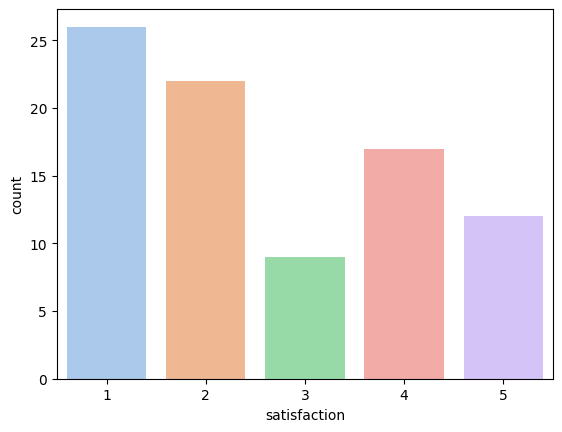

In [ ]:
import seaborn as sns
sns.countplot(x = 'satisfaction', data = survey, palette = 'pastel')

## 만족도가 4,5인 데이터에서 comment열에 "좋-다" 단어가 들어간 빈도는?

In [ ]:
high_satisfaction = survey.query('satisfaction >= 4')
high_satisfaction['good'] = high_satisfaction['comment'].str.contains('좋다|좋겠다')
high_satisfaction

<ipython-input-34-e1ad407c26c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_satisfaction['good'] = high_satisfaction['comment'].str.contains('좋다|좋겠다')


,datetime,comment,satisfaction,good
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,True
2,2019-02-18,육아 지원이 좋다,5,True
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4,False
8,2019-04-17,병원이 충분하다,4,False
9,2019-03-07,사이클링 코스가 좋다,5,True
11,2019-02-17,초등학교가 깨끗해서 좋다,4,True
13,2019-01-09,근처에 공원이 있어서 살기 좋다,4,True
15,2019-01-02,육아가 쉽다,4,False
17,2019-02-12,상가를 좀 더 활기차게 만들었으면 좋겠다.,4,True
19,2019-02-20,쓰레기 처리가 편함,4,False


<Axes: xlabel='good', ylabel='count'>

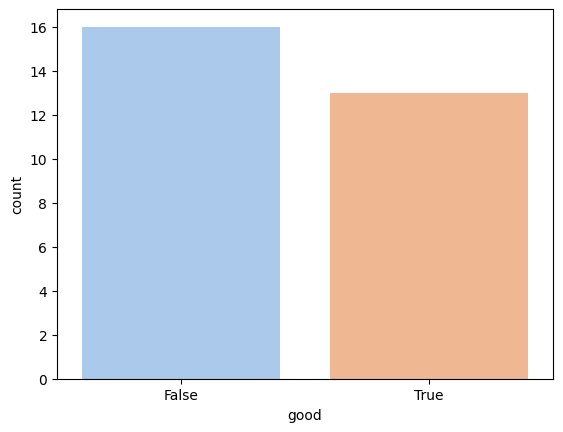

In [ ]:
sns.countplot(x = 'good', data = high_satisfaction, palette = 'pastel')

- 만족도가 4이상인 그룹에서 "좋다/좋겠다" 단어가 들어간 빈도는 들어가지 않은 경우보다 적다.

<Axes: xlabel='satisfaction', ylabel='count'>

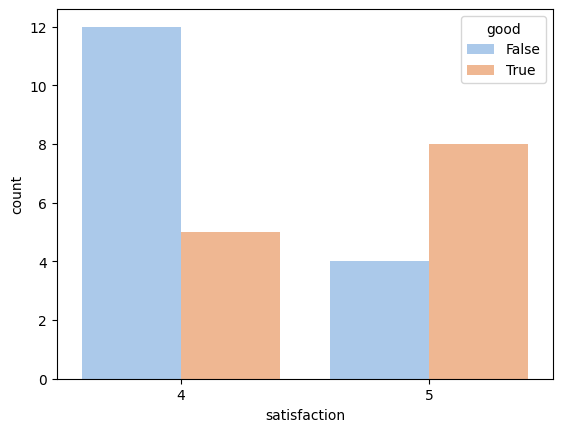

In [ ]:
sns.countplot(x = 'satisfaction', data = high_satisfaction,hue='good', palette = 'pastel')

- 그러나 만족도4,5로 따로 보자면 만족도가 높은 경우 "좋다/좋겠다"라는 단어를 많이 쓴 경우를 볼 수 있다.

## Survey에서 만족도가 낮은 경우의 수가 더 많았으므로 낮은 경우 어떠한 이유로 낮았는지 확인

In [ ]:
low_satisfaction = survey.query('satisfaction < 3')
low_satisfaction

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1
4,2019-01-06,역앞 상가가 쓸쓸하다,2
6,2019-02-02,놀 장소가 없다,2
10,2019-02-15,축제를 좀 더 성대하게 했으면 좋겠다,2
12,2019-03-06,공원이 더 필요하다,2
14,2019-01-03,슈퍼까지 가는게 힘들어,1
18,2019-03-15,밤길이 어둡다 (지구),1
20,2019-02-13,영화관이 아쉽다,2
22,2019-04-21,공원을 추가해 주었으면 한다,2
23,2019-01-01,관광 명소가 없다,1


- 만족도가 낮은 경우 "좋겠다/달라/바란다"의 단어가 들어갔을 때 어떤 불편함이 개선되면 좋을지에 대해 구체적으로 제시했을 수 있다.
- 따라서 "좋겠다/달라'바란다" 단어가 들어간 데이터를 추출하여 어떤 불편함을 개선하고 싶은지 확인한다.

In [ ]:
low_satisfaction['wish'] = low_satisfaction['comment'].str.contains('좋겠다|달라|바란다')
low_satisfaction.query('wish==True')

<ipython-input-62-a7306ed2ad75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_satisfaction['wish'] = low_satisfaction['comment'].str.contains('좋겠다|달라|바란다')


,datetime,comment,satisfaction,wish
10,2019-02-15,축제를 좀 더 성대하게 했으면 좋겠다,2,True
33,2019-02-07,워킹맘의 지원을 더 늘렸으면 좋겠다,2,True
39,2019-03-11,이상한 아저씨가 말을 걸어온 적이 있다.경찰 순찰을 더 강화해 주길 바란다,1,True
44,2019-02-28,에 신호등이 없는 사거리가 때문에 사고가 날것 같아 두렵다. 신호를 해달라.,1,True
45,2019-04-29,상가의 활성화 활동을 좀더 행정이 뒷받침해 주길 바란다,1,True
51,2019-04-03,지역 자치단체를 더 지원해주길 바란다,2,True
55,2019-03-18,주차장 수가 적고 요금이 비싸다.역 앞에 공공 주차장을 만들어 주길 바란다,1,True
58,2019-03-01,버스 노선을 늘려 주길 바란다,1,True
63,2019-03-24,지난달 직원 비리의혹에 대해 좀 더 자세히 설명해 달라,1,True
77,2019-01-10,고속도로로 나가는 길이 좁아서 정체가 심하다. 확장해 주었으면 좋겠다,1,True


직접적으로 만족도가 낮은 이유에 대해 의견을 제시했기 때문에 만족도를 높이기 위해 어떠한 점을 개선해야하는지 알 수 있다.

## 시간에 따른 만족도 변화

In [ ]:
survey['datetime'] = pd.to_datetime(survey.datetime)
survey.sort_index(inplace=True)

<Axes: xlabel='datetime'>

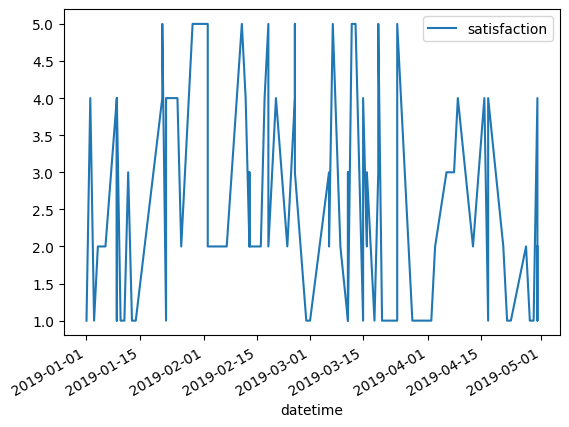

In [ ]:
survey.plot(x='datetime',y='satisfaction')

In [ ]:
date = '2019-03-01'
survey.query('datetime == @date')

,datetime,comment,satisfaction
58,2019-03-01,버스 노선을 늘려 주길 바란다,1


특정 날짜를 지정해 조사 결과를 확인할 수 있다.

- 날짜의 변화와 만족도 변화와의 상관관계는 보이지 않는다.
- 만족도에 따른 내용분석이 중요해보인다.